![insomnia](data/insomnia.jpg)


Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

## 1. Data Loading and Initial Overview
In this step, we’ll load the dataset containing information about individuals' sleep patterns and health attributes.  
Before starting any cleaning or analysis, let's take a quick look at the data structure to understand:
- What types of values are stored (numeric, categorical, etc.)
- Whether there are any immediately visible data quality issues

In [1]:
import pandas as pd

# Load the dataset
sleep_health_data = pd.read_csv('data/sleep_health_data.csv')

# Display the first few rows
sleep_health_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,25.0,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,100000000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleepapnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [2]:
# Get basic info about data types and missing values
sleep_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### Data Overview Insights

- The dataset contains **374 rows** and **13 columns**, which matches the client’s description — no missing records overall.
- Three data types are present: `float64`, `int64`, and `object`.  
- Several columns appear to be **categorical** but are stored as `object`:
  - `Gender`, `Occupation`, `BMI Category`, and `Sleep Disorder`
- The `Sleep Disorder` column has **155 non-null values**, meaning a large number of missing entries.

### Handling Incorrectly Parsed 'None' Values
While reviewing the dataset, I noticed that the `Sleep Disorder` column had only **155 non-null values**, which seemed inconsistent with the dataset documentation. Upon inspection, it became clear that pandas interpreted the string **"None"** as a missing value (`NaN`) during CSV import.

To preserve `None` as a valid category (representing no sleep disorder), a list of valid NaNs (excluding `None`) based on pandas documentation was created and the dataset was reloaded using `na_values` and `keep_default_na` to prevent this automatic conversion.

In [3]:
# List of valid NaNs
allowed_nans = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN',
                '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA',
                'NULL', 'NaN', 'n/a', 'nan', 'null']

# Load the dataset
sleep_health_data = pd.read_csv('data/sleep_health_data.csv', na_values=allowed_nans, keep_default_na=False)

# Get basic info about data types and missing values
sleep_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## 2. Initial Statistical Summary
Before performing data cleaning, it’s important to examine the statistical properties of the numerical columns.  
The `.describe()` summary can help us identify:
- potential outliers
- unrealistic or inconsistent values
- unexpected distributions
- columns that might need type conversion

In [9]:
# Get statistical summary for nummerical columns of DataFrame
sleep_health_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,3.740000e+02
mean,187.500000,42.184492,7.182620,7.350267,59.171123,5.403743,70.165775,2.741698e+05
std,108.108742,8.673133,1.218025,1.363164,20.830804,1.837963,4.135676,5.170525e+06
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3.000000e+03
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5.600000e+03
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7.000000e+03
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8.000000e+03
max,374.000000,59.000000,25.000000,20.000000,90.000000,15.000000,86.000000,1.000000e+08


### Summary of Numerical Column Inspection

After reviewing the numerical summary (`.describe()`), I identified several data quality issues:

- **Sleep Duration**: Max value = 25 hours (impossible; exceeds 24 hours in a day)
- **Quality of Sleep**: Defined as a 1–10 scale, but max value = 20
- **Stress Level**: Also 1–10 scale, but max value = 15
- **Daily Steps**: Contains unrealistic values (up to 100,000,000 steps/day)
- **Age, Heart Rate, Physical Activity Level**: All values appear reasonable
- **Person ID**: Valid range and correctly sequenced

These issues need to be investigated and cleaned before any modeling or deep analysis.

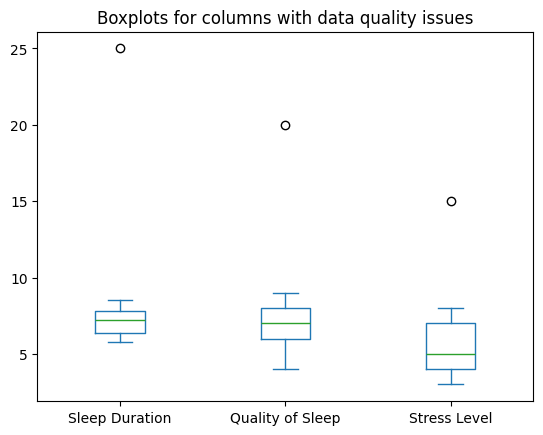

In [20]:
import matplotlib.pyplot as plt

# Plotting outliers
sleep_health_data[['Sleep Duration', 'Quality of Sleep', 'Stress Level']].plot.box()
plt.title('Boxplots for columns with data quality issues')
plt.show()

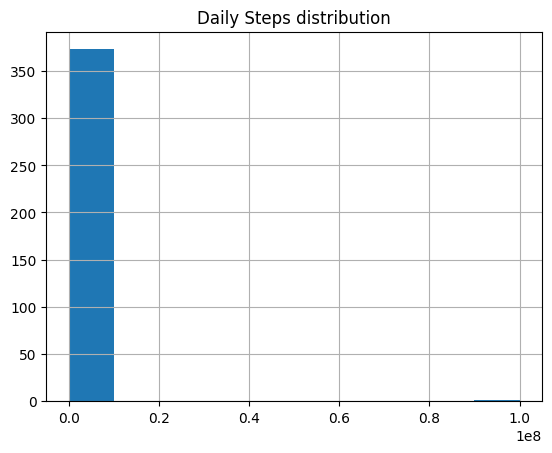

In [22]:
# Showing Daily Steps distribution
sleep_health_data['Daily Steps'].hist()
plt.title('Daily Steps distribution')
plt.show()

Cleaning abovementioned errors
Analysis for categorical values (eg. describe(include='object'))